### Pandas use TIMESTAMP objects and construct a DatetimeIndex that can be used to index data in a series or DataFrame.

In [40]:
import pandas as pd
date = pd.to_datetime("4th of July, 2020")
date

Timestamp('2020-07-04 00:00:00')

In [41]:
date.strftime("%A")

'Saturday'

## Pandas Time Series : Indexing by Time

In [42]:
#we can construct a Series Object that has time indexed data:
index = pd.DatetimeIndex(['2020-04-15', '2020-05-15',
                         '2021-04-15', '2021-05-15'])
index

DatetimeIndex(['2020-04-15', '2020-05-15', '2021-04-15', '2021-05-15'], dtype='datetime64[ns]', freq=None)

In [43]:
data = pd.Series([0,1,2,3], index=index)
data

2020-04-15    0
2020-05-15    1
2021-04-15    2
2021-05-15    3
dtype: int64

In [44]:
data['2020-04-15':'2021-04-15']

2020-04-15    0
2020-05-15    1
2021-04-15    2
dtype: int64

In [45]:
data['2020']

2020-04-15    0
2020-05-15    1
dtype: int64

#### date range

In [46]:
pd.date_range('2020-07-03', '2020-07-29')

DatetimeIndex(['2020-07-03', '2020-07-04', '2020-07-05', '2020-07-06',
               '2020-07-07', '2020-07-08', '2020-07-09', '2020-07-10',
               '2020-07-11', '2020-07-12', '2020-07-13', '2020-07-14',
               '2020-07-15', '2020-07-16', '2020-07-17', '2020-07-18',
               '2020-07-19', '2020-07-20', '2020-07-21', '2020-07-22',
               '2020-07-23', '2020-07-24', '2020-07-25', '2020-07-26',
               '2020-07-27', '2020-07-28', '2020-07-29'],
              dtype='datetime64[ns]', freq='D')

In [47]:
pd.date_range('2015-07-03',periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

# Example:

## Visualising Seattle Bicycle Counts

In [48]:
# !curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

In [72]:
import numpy as np
data = pd.read_csv('C:\\Users\\acer\\ml\\datasets\\FremontBridge.csv', index_col='Date', parse_dates=True)

In [50]:
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [54]:
# #short the column namesa and add "total" column
data.columns = ['Total','West','East']
# data['Total'] = data.eval('West+East')

data.dropna().describe()

,Total,West,East
count,67118.000000,67118.000000,67118.000000
mean,112.912527,51.559835,61.352692
std,144.160880,66.522811,89.768937
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,60.000000,28.000000,30.000000
75%,147.000000,69.000000,74.000000
max,1097.000000,698.000000,850.000000


### Visualizing the data

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

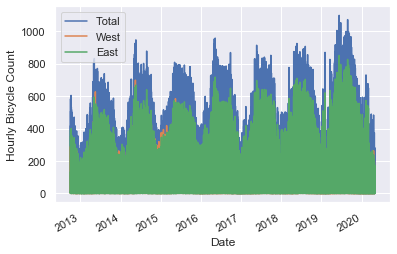

In [64]:
data.plot()
plt.ylabel('Hourly Bicycle Count');

Text(0, 0.5, 'Weekly bicycle count')

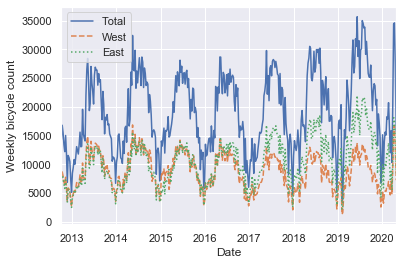

In [66]:
#resample the data
weekly = data.resample('W').sum()
weekly.plot(style=['-', '--', ':'])
plt.ylabel('Weekly bicycle count')

Text(0, 0.5, 'mean hourly count')

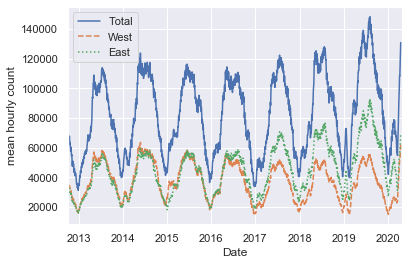

In [69]:
#30 day mean of our data
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=['-','--',':'])
plt.ylabel('mean hourly count')

#### Digging info the data

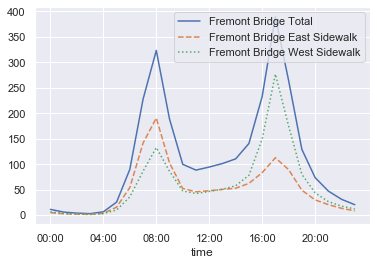

In [74]:
#hourly record
byTime = data.groupby(data.index.time).mean()
hourlyTrick = 4 * 60 * 60 * np.arange(6)
byTime.plot(xticks=hourlyTrick, style = ['-', '--',':']);


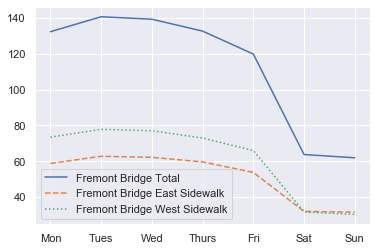

In [75]:
# now we will track day wise in a week
byWeekday = data.groupby(data.index.dayofweek).mean()
byWeekday.index = ['Mon','Tues','Wed','Thurs','Fri','Sat', 'Sun']
byWeekday.plot(style=['-','--',':'])